# Summary

**Train 8 models based on the artificial feature dataset.**

# Rule Based Model Training Experiment

Input data: Edge direction data of the image
Model:

In [1]:
!ls *.csv

demo.csv          test_data.csv     training_data.csv


## Data Preprocessing 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ast

In [3]:
def updateDF(df,columns):
    # change num list string to num list such as '[1, 2, 3]' ==> [1, 2, 3]
    for column in columns:
        new_data = []
        lis_strings = df[column].values
        for s in lis_strings:
            # change from string to list
            lis = ast.literal_eval(s)
            new_data.append(lis)
        df[column] = new_data

In [4]:
room = pd.read_csv('../feature dataset/training_data.csv')
room_test = pd.read_csv('../feature dataset/test_data.csv')
# update degree_hist string to list
updateDF(room, ['degrees_hist'])
updateDF(room_test, ['degrees_hist'])

### Process X (independent) and Y (target) data

In [5]:
X, y = room.degrees_hist, room.label
X_test, y_test = room_test.degrees_hist, room_test.label

In [6]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(y_train.value_counts())
print(y_valid.value_counts())
print(room["label"].value_counts())

X_train = np.array(X_train.tolist())
X_valid = np.array(X_valid.tolist())
X_test = np.array(X_test.tolist())
y_train = (y_train == 'clean')
y_valid = (y_valid == 'clean')
y_test = (y_test == 'clean')

clean    124
messy    100
Name: label, dtype: int64
clean    31
messy    25
Name: label, dtype: int64
clean    155
messy    125
Name: label, dtype: int64


In [7]:
X_train.shape, X_valid.shape, X_test.shape

((224, 181), (56, 181), (10, 181))

## Model Training

1. SGD Classifier
2. Decision Tree
3. Naive Bayes
4. Logistic Regression
5. Support Vector Machines
6. Random Forest (Bagging Model)
7. Voting Classifer (Ensemble)
8. XGBoost (Boosting Model)

In [8]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

def eval_model(classifier, train_x, train_y, test_x, test_y):
    print('Training dataset evaluation:')
    y_train_predict = classifier.predict(train_x)
    print('Confusion Matrix:\n', confusion_matrix(train_y, y_train_predict))
    print('Precision is: ', precision_score(train_y, y_train_predict))
    print('Recall is: ', recall_score(train_y, y_train_predict))
    print('Accuracy is: ', accuracy_score(train_y, y_train_predict))
    
    print('\nValidation dataset evaluation:')
    y_test_predict = classifier.predict(test_x)
    print('Confusion Matrix:\n', confusion_matrix(test_y, y_test_predict))
    print('Precision is: ', precision_score(test_y, y_test_predict))
    print('Recall is: ', recall_score(test_y, y_test_predict))
    print('Accuracy is: ', accuracy_score(test_y, y_test_predict))
    return 

### 1. SGD Classifier

In [9]:
# stochastic gradient descent classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = "log",random_state=50,verbose=0)
# sgd_clf = SGDClassifier(random_state=50,verbose=0)
sgd_clf.fit(X_train, y_train)
eval_model(sgd_clf,X_train,y_train,X_valid,y_valid)

Training dataset evaluation:
Confusion Matrix:
 [[ 42  58]
 [  1 123]]
Precision is:  0.6795580110497238
Recall is:  0.9919354838709677
Accuracy is:  0.7366071428571429

Validation dataset evaluation:
Confusion Matrix:
 [[11 14]
 [ 1 30]]
Precision is:  0.6818181818181818
Recall is:  0.967741935483871
Accuracy is:  0.7321428571428571


### 2. Decision Tree

In [10]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
eval_model(tree_clf,X_train,y_train,X_valid,y_valid)

Training dataset evaluation:
Confusion Matrix:
 [[100   0]
 [  0 124]]
Precision is:  1.0
Recall is:  1.0
Accuracy is:  1.0

Validation dataset evaluation:
Confusion Matrix:
 [[16  9]
 [ 9 22]]
Precision is:  0.7096774193548387
Recall is:  0.7096774193548387
Accuracy is:  0.6785714285714286


### 3. Naive Bayes

In [11]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
eval_model(nb_clf,X_train,y_train,X_valid,y_valid)

Training dataset evaluation:
Confusion Matrix:
 [[ 21  79]
 [  5 119]]
Precision is:  0.601010101010101
Recall is:  0.9596774193548387
Accuracy is:  0.625

Validation dataset evaluation:
Confusion Matrix:
 [[ 6 19]
 [ 2 29]]
Precision is:  0.6041666666666666
Recall is:  0.9354838709677419
Accuracy is:  0.625


### 4. Logistic Regression

In [12]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression, SGDClassifier

log_clf = LogisticRegression(solver='lbfgs')
log_clf.fit(X_train, y_train)
eval_model(log_clf,X_train,y_train,X_valid,y_valid)

Training dataset evaluation:
Confusion Matrix:
 [[ 60  40]
 [ 15 109]]
Precision is:  0.7315436241610739
Recall is:  0.8790322580645161
Accuracy is:  0.7544642857142857

Validation dataset evaluation:
Confusion Matrix:
 [[16  9]
 [ 4 27]]
Precision is:  0.75
Recall is:  0.8709677419354839
Accuracy is:  0.7678571428571429


### 5. Support Vector Machines

In [13]:
# Support Vector Machines
from sklearn.svm import LinearSVC, SVC

svc_clf = SVC(kernel='linear', probability=True)
# svc_clf = LinearSVC()
svc_clf.fit(X_train, y_train)
eval_model(svc_clf,X_train,y_train,X_valid,y_valid)

Training dataset evaluation:
Confusion Matrix:
 [[ 63  37]
 [ 14 110]]
Precision is:  0.7482993197278912
Recall is:  0.8870967741935484
Accuracy is:  0.7723214285714286

Validation dataset evaluation:
Confusion Matrix:
 [[16  9]
 [ 4 27]]
Precision is:  0.75
Recall is:  0.8709677419354839
Accuracy is:  0.7678571428571429


### 6. Random Forest (Bagging Model)

In [14]:
# Random Forest (Bagging Model)
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)
rf_clf.fit(X_train, y_train)
eval_model(rf_clf,X_train,y_train,X_valid,y_valid)

Training dataset evaluation:
Confusion Matrix:
 [[100   0]
 [  0 124]]
Precision is:  1.0
Recall is:  1.0
Accuracy is:  1.0

Validation dataset evaluation:
Confusion Matrix:
 [[22  3]
 [ 9 22]]
Precision is:  0.88
Recall is:  0.7096774193548387
Accuracy is:  0.7857142857142857


### 7. Voting Classifer (Ensemble)

In [15]:
from sklearn.ensemble import VotingClassifier

# hard voting
voting_clf_hard = VotingClassifier(estimators=[('sgd',sgd_clf),('tree',tree_clf),('nb',nb_clf),\
                                          ('log',log_clf),('svc',svc_clf),('rf',rf_clf)], voting='hard')
voting_clf_hard.fit(X_train, y_train)
eval_model(voting_clf_hard,X_train,y_train,X_valid,y_valid)

Training dataset evaluation:
Confusion Matrix:
 [[ 68  32]
 [  5 119]]
Precision is:  0.7880794701986755
Recall is:  0.9596774193548387
Accuracy is:  0.8348214285714286

Validation dataset evaluation:
Confusion Matrix:
 [[16  9]
 [ 5 26]]
Precision is:  0.7428571428571429
Recall is:  0.8387096774193549
Accuracy is:  0.75


In [16]:
# soft voting
voting_clf_soft = VotingClassifier(estimators=[('sgd',sgd_clf),('tree',tree_clf),('nb',nb_clf),\
                                          ('log',log_clf),('svc',svc_clf),('rf',rf_clf)], voting='soft')
voting_clf_soft.fit(X_train, y_train)
eval_model(voting_clf_soft,X_train,y_train,X_valid,y_valid)

Training dataset evaluation:
Confusion Matrix:
 [[ 89  11]
 [  0 124]]
Precision is:  0.9185185185185185
Recall is:  1.0
Accuracy is:  0.9508928571428571

Validation dataset evaluation:
Confusion Matrix:
 [[16  9]
 [ 5 26]]
Precision is:  0.7428571428571429
Recall is:  0.8387096774193549
Accuracy is:  0.75


### 8. XGBoost (Boosting Model)

In [17]:
# XGBoost (Boosting Model)
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
eval_model(xgb_clf,X_train,y_train,X_valid,y_valid)

Training dataset evaluation:
Confusion Matrix:
 [[100   0]
 [  0 124]]
Precision is:  1.0
Recall is:  1.0
Accuracy is:  1.0

Validation dataset evaluation:
Confusion Matrix:
 [[21  4]
 [10 21]]
Precision is:  0.84
Recall is:  0.6774193548387096
Accuracy is:  0.75


## Model Validation

In [18]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_predict

models = [sgd_clf,tree_clf,nb_clf,log_clf,svc_clf,rf_clf,voting_clf_soft,xgb_clf]
linestyle=[':', '-', '--', '-.']

def plot_roc_curve(models, X_test, y_test, label=None):
    plt.figure(figsize=(10,6))
    for clf in models:
        name = clf.__class__.__name__
        y_scores = clf.predict_proba(X_test)  
        fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])  # ROC
        roc_auc = auc(fpr, tpr)
        i=np.random.choice(len(linestyle))
        plt.plot(fpr, tpr, linewidth=2, label='AUC = %0.2f,  %s' %(roc_auc,name), linestyle=linestyle[i], alpha=0.6)
        # benchmark
        plt.plot([0, 1], [0, 1], 'k--',alpha=0.3)
        plt.axis([-0.01, 1.015, -0.01, 1.015])
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

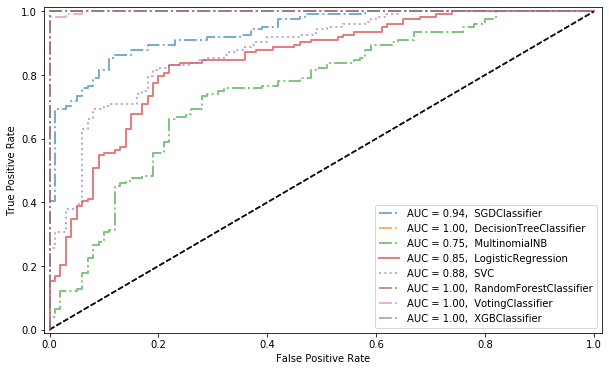

In [19]:
# Training set
plot_roc_curve(models, X_train, y_train)
plt.show()

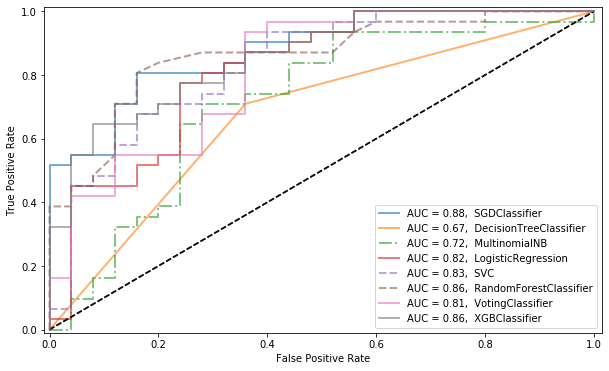

In [20]:
# Validation set
plot_roc_curve(models,X_valid, y_valid)
plt.show()

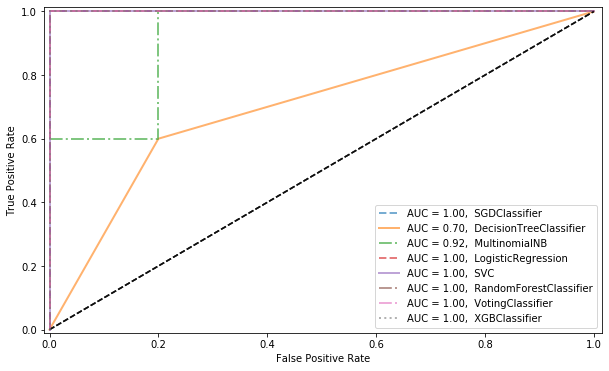

In [21]:
# Test set
plot_roc_curve(models, X_test, y_test)
plt.show()

## Model Test and Predict

In [22]:
def evaluateTest(classifier):
    print(classifier.__class__.__name__)
    y_test_predict = classifier.predict(X_test)
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_test_predict))
    print('Precision is: ', precision_score(y_test, y_test_predict))
    print('Recall is: ', recall_score(y_test, y_test_predict))
    print('Accuracy is: ', accuracy_score(y_test, y_test_predict))

### Predict

In [24]:
def predictMessyClean(clf):
    y_test_predict = clf.predict(X_test)
    
    img_dir = "../dataset/Test/"
    fnames = room_test.fname.values
    plt.figure(figsize=(20,8))
    
    for i in range(len(fnames)):
        img_path = img_dir+fnames[i]
        image = mpimg.imread(img_path)
        plt.subplot(2,5,i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title('Clean' if y_test_predict[i] else "Messy", fontsize=20)
        i+=1
    plt.show()
    print()

----------------------------
SGDClassifier
Confusion Matrix:
 [[3 2]
 [0 5]]
Precision is:  0.7142857142857143
Recall is:  1.0
Accuracy is:  0.8


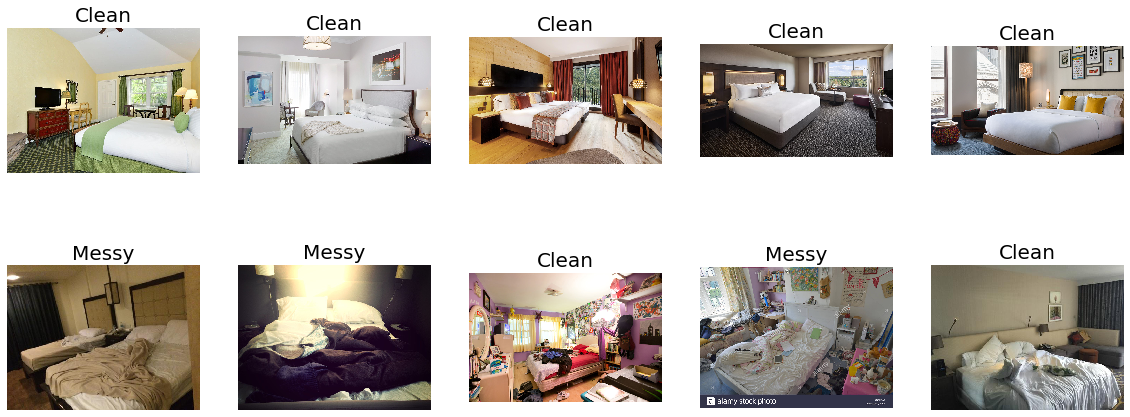


----------------------------
DecisionTreeClassifier
Confusion Matrix:
 [[4 1]
 [2 3]]
Precision is:  0.75
Recall is:  0.6
Accuracy is:  0.7


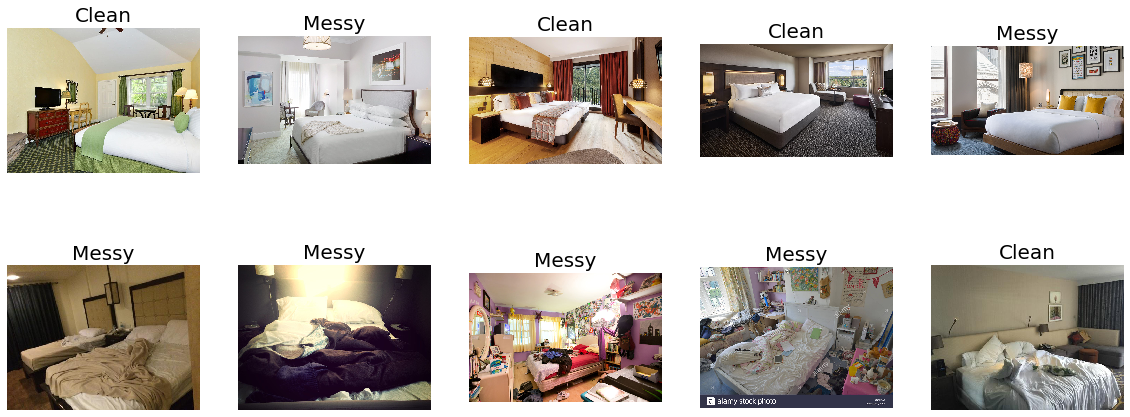


----------------------------
MultinomialNB
Confusion Matrix:
 [[1 4]
 [0 5]]
Precision is:  0.5555555555555556
Recall is:  1.0
Accuracy is:  0.6


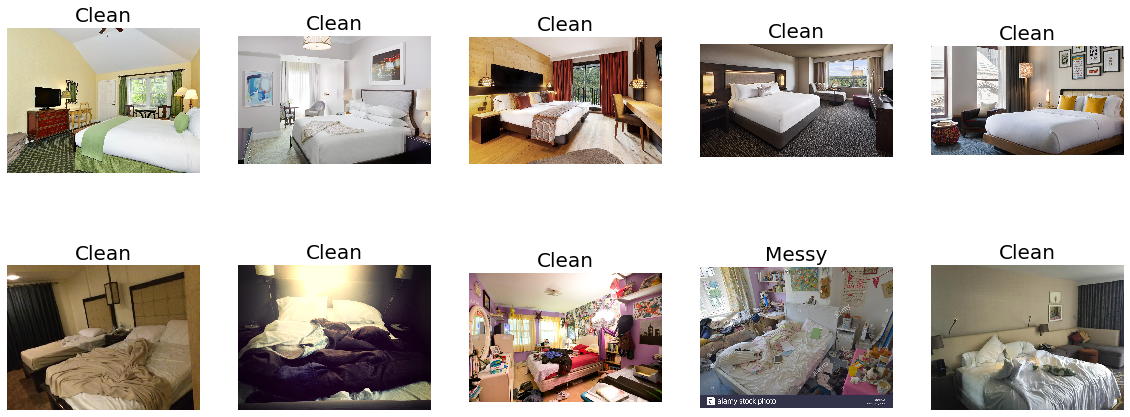


----------------------------
LogisticRegression
Confusion Matrix:
 [[5 0]
 [0 5]]
Precision is:  1.0
Recall is:  1.0
Accuracy is:  1.0


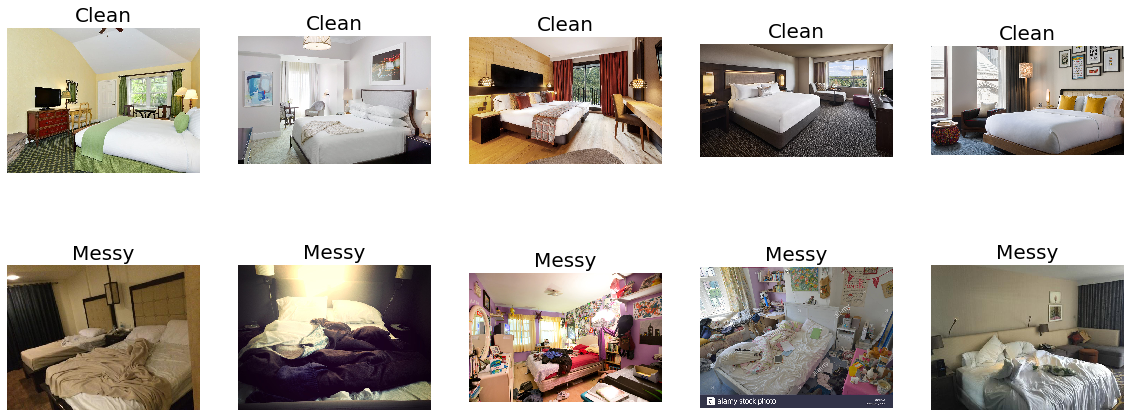


----------------------------
SVC
Confusion Matrix:
 [[5 0]
 [0 5]]
Precision is:  1.0
Recall is:  1.0
Accuracy is:  1.0


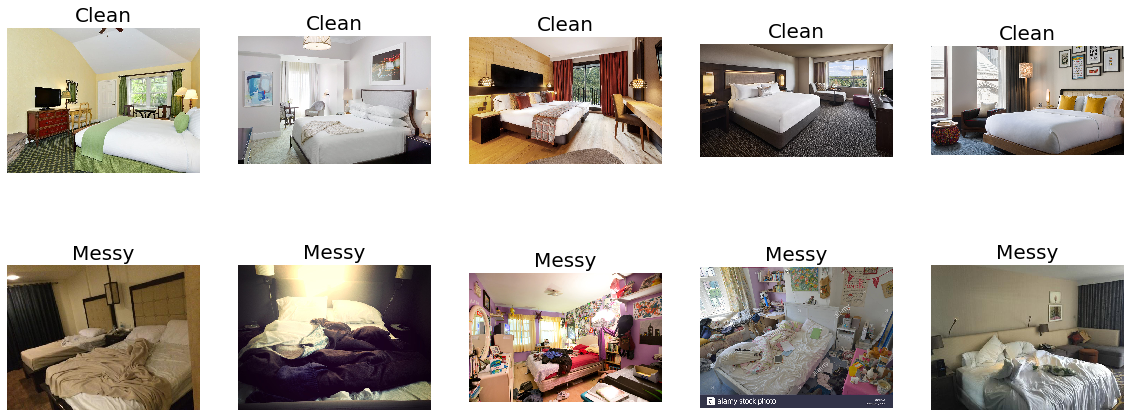


----------------------------
RandomForestClassifier
Confusion Matrix:
 [[5 0]
 [0 5]]
Precision is:  1.0
Recall is:  1.0
Accuracy is:  1.0


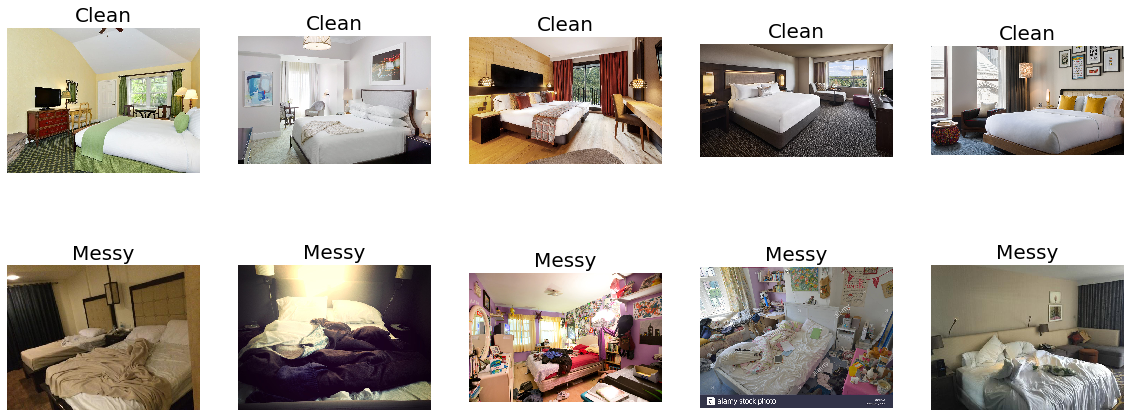


----------------------------
VotingClassifier
Confusion Matrix:
 [[5 0]
 [0 5]]
Precision is:  1.0
Recall is:  1.0
Accuracy is:  1.0


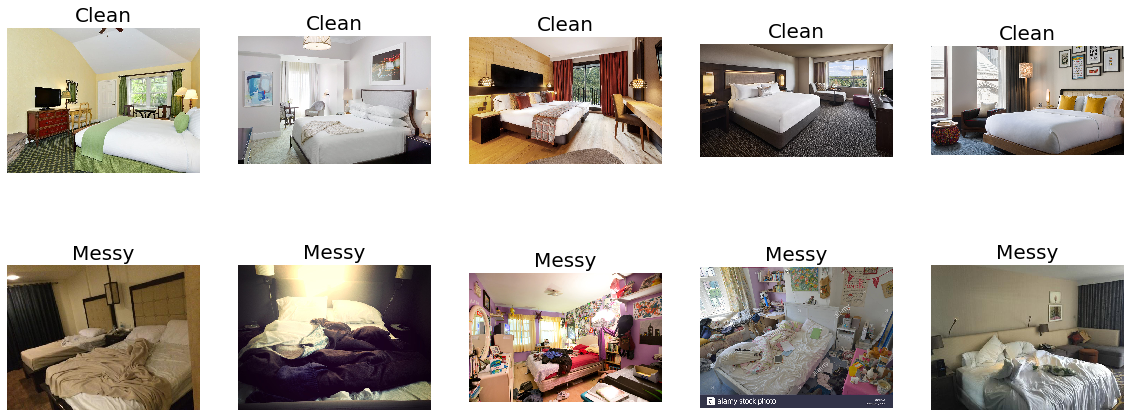


----------------------------
VotingClassifier
Confusion Matrix:
 [[4 1]
 [0 5]]
Precision is:  0.8333333333333334
Recall is:  1.0
Accuracy is:  0.9


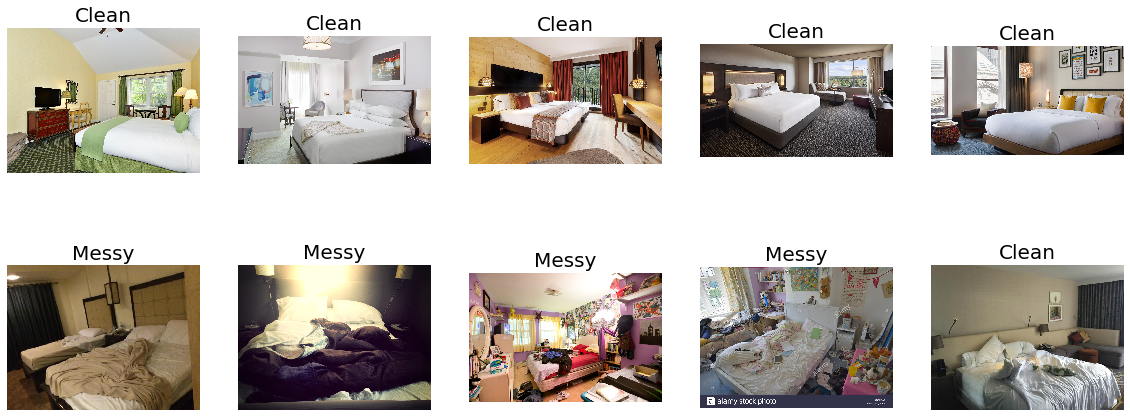


----------------------------
XGBClassifier
Confusion Matrix:
 [[4 1]
 [0 5]]
Precision is:  0.8333333333333334
Recall is:  1.0
Accuracy is:  0.9


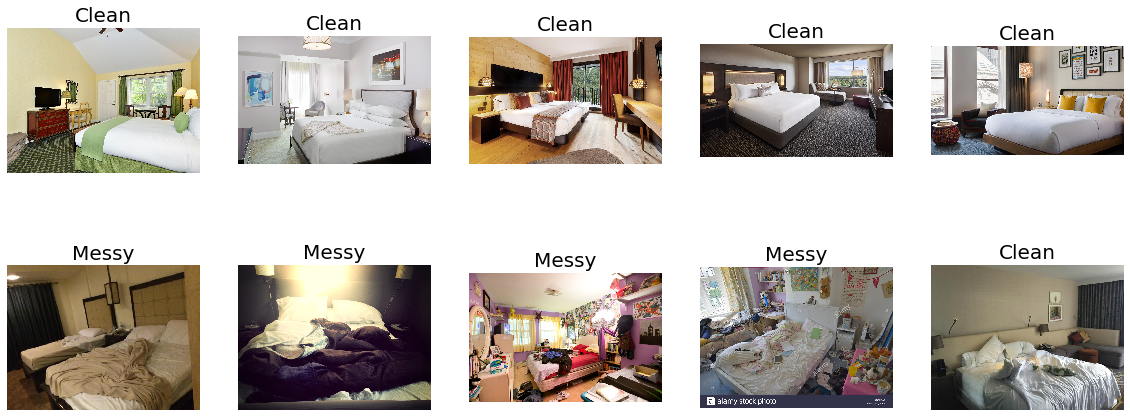

In [25]:
models = [sgd_clf,tree_clf,nb_clf,log_clf,svc_clf,rf_clf,voting_clf_hard,voting_clf_soft,xgb_clf]
for model in models:
    print('----------------------------')
    evaluateTest(model)
    predictMessyClean(model)